# EDA on Factors Affecting The Pricing of Cars

In [1]:
# Importing all required packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# supress warnings
import warnings
warnings.simplefilter(action='ignore',category=FutureWarning)

from pandas.core.common import SettingWithCopyWarning
warnings.simplefilter(action="ignore", category=SettingWithCopyWarning)

### Step 1: Reading and Understanding the Data
Let's start with the following steps:
<ol>
<li>Importing data using the pandas library</li>
<li>Understanding the structure of the data</li>
</ol>

In [2]:
data=pd.read_csv('D:\\CBE Data Science Course\\FIles for EDA\\CarPrice_Assignment.csv') #importing dataset
data.head() #to view top 5 lines of dataset

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [3]:
#gives no of rows and columns
data.shape

(205, 26)

> High level statistics

In [4]:
#lets get an overview and some statistics of dataset
data.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
data.info() #to check whether the dataset has null values or not

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

#### Observations
<ul>
<li>It has 205 rows/data points with 26 columns/features.</li>

<li>Minimum price of the car is 5118.0, maximum price of the car is 45400.0. mean with an average of 13276.71, deviation is of 7988.85 </li>

<li>75% cars price has lessthan 16503.0 and 25% cars price has lessthan 7788.0</li>
    
<li>Sample dataset has no null values
</ul>

### Step 2 : Data Cleaning and Preparation

In [6]:
#Splitting company name from CarName column
CompanyName = data['CarName'].apply(lambda x : x.split(' ')[0])
data.insert(3,"CompanyName",CompanyName)
data.drop('CarName',axis=1,inplace=True)
data.head()

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [7]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

#### Fixing invalid values
There seems to be some spelling error in the CompanyName column.

- maxda and mazda are same
- Nissan and nissan are same
- vokswagen volkswagen and vw are same
- toyota and toyouta are same
- porcshce and porcshce are same


In [8]:
data["CompanyName"] [data["CompanyName"]=="toyouta"]= "toyota"
data["CompanyName"] [data["CompanyName"]=="maxda"]= "mazda"
data["CompanyName"] [data["CompanyName"]=="Nissan"]= "nissan"
data["CompanyName"] [data["CompanyName"]=="porcshce"]= "porsche"
data["CompanyName"] [data["CompanyName"].isin(["vokswagen","vw"])]= "volkswagen"

In [9]:
data.CompanyName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [10]:
#Checking for duplicates
data.loc[data.duplicated()]

,car_ID,symboling,CompanyName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


In [11]:
data.columns

Index(['car_ID', 'symboling', 'CompanyName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

### Step 3: Visualizing the data

#### 1. Univariate ---- single variable analysis

<b> a) Categorical data </b>

1. CompanyName
2. symboling
3. fueltype
4. aspiration
5. doornumber
6. carbody
7. drivewheel
8. enginelocation
9. enginetype
10. cylindernumber
11. fuelsystem

<b> b) Continuous data </b>

1. wheelbase 
2. carlength
3. carwidth
4. carheight
5. curbweight
6. enginesize
7. boreratio
8. stroke
9. compressionratio
10. horsepower
11. peakrpm
12. citympg
13. highwaympg
14. price

- from 26 columns exept car_ID variable, Total 25 variables are splited into categorical & continuous.

#### 2. Bivariate --- tow variables analysis

Bivariate can be applied to these variable combinations:
- Categorical & Categorical
- Categorical & Continuous
- Continuous & Categorical
- Continuous & Continuous

#### Target Variable for Analysis is the price.
* need to find factors affecting the pricing of cars, So the price is compared with all categorical & continuous variables.  

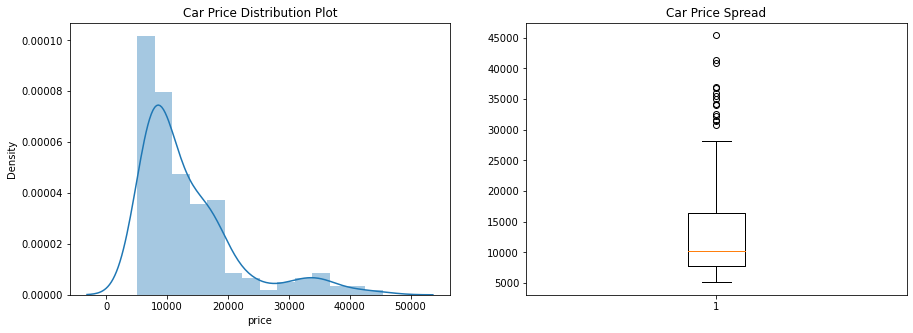

In [12]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(data.price) #histogram representation of the distribution of data

plt.subplot(1,2,2)
plt.title('Car Price Spread') #to shows the distribution of quantitative data
plt.boxplot(data.price)

plt.show()

In [13]:
data.price.describe() #Univariate analysis

count      205.000000
mean     13276.710571
std       7988.852332
min       5118.000000
25%       7788.000000
50%      10295.000000
75%      16503.000000
max      45400.000000
Name: price, dtype: float64

<b> Inference:</b>

* The mean (13276.7) and median(10295.0) of price are significantly different.
* A large standard deviation indicates that there is considerable variance in the prices of automobiles.
* Price values are on the right-skewed or positive side, most cars are priced at the lower end (9000) of the price range.

### Step 3.1: Price comparison with categorical variables

#### 1. car_ID 

- car_ID : Unique ID for each observation

#### 2. symboling

* Its assigned insurance risk rating
* A value of +3 indicates that the auto is risky,
* -3 that it is probably pretty safe.(Categorical)

- Let's see the count of automobile in each category and percent share of each category.

In [14]:
data.symboling.value_counts() #symboling column is categorical because it has finate data

 0    67
 1    54
 2    32
 3    27
-1    22
-2     3
Name: symboling, dtype: int64

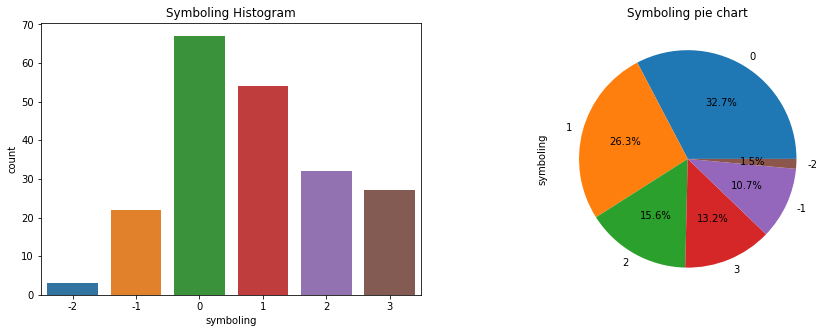

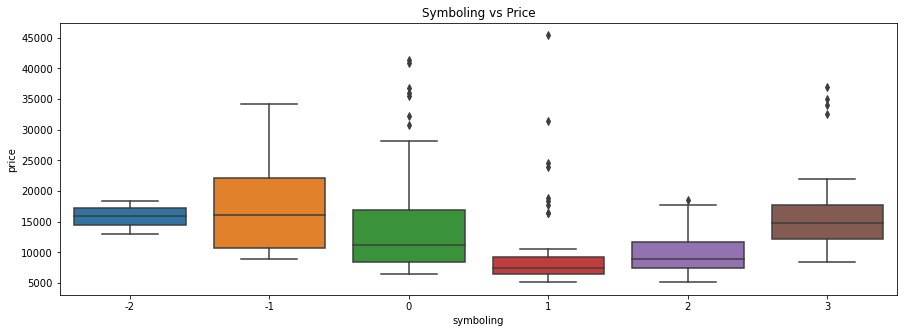

In [15]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Symboling Histogram')
sns.countplot(data.symboling) #to print bar chat using seaborn as sns


plt.subplot(1,2,2)
plt.title('Symboling pie chart')
data.symboling.value_counts().plot(kind='pie',autopct= '%1.1f%%') #pie chart using matplotlib as plt
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=data.symboling,y=data.price)#boxplot for Continuous & Categorical variables
plt.title('Symboling vs Price')
plt.show()
#Scatterplot only for gradually increasing or decreasing value that comes in both continuous variable

<b>Inference:</b>
- It seems that the symboling with 0 and 1 values have high number of rows (i.e. They are most sold.)<b>(from Symboling Histogram)</b>
- The cars with -1 symboling seems to be high priced (as it makes sense too, insurance risk rating -1 is quite good). But it seems that symboling with 3 value has the price range similar to -2 value. There is a dip in price at symboling 1.<b>(from Symboling vs Price)</b>

> Thus Symboling affects the pricing of cars

#### 3. CompanyName

In [16]:
data.CompanyName.value_counts()

toyota         32
nissan         18
mazda          17
mitsubishi     13
honda          13
volkswagen     12
subaru         12
peugeot        11
volvo          11
dodge           9
bmw             8
buick           8
plymouth        7
audi            7
saab            6
porsche         5
isuzu           4
alfa-romero     3
chevrolet       3
jaguar          3
renault         2
mercury         1
Name: CompanyName, dtype: int64

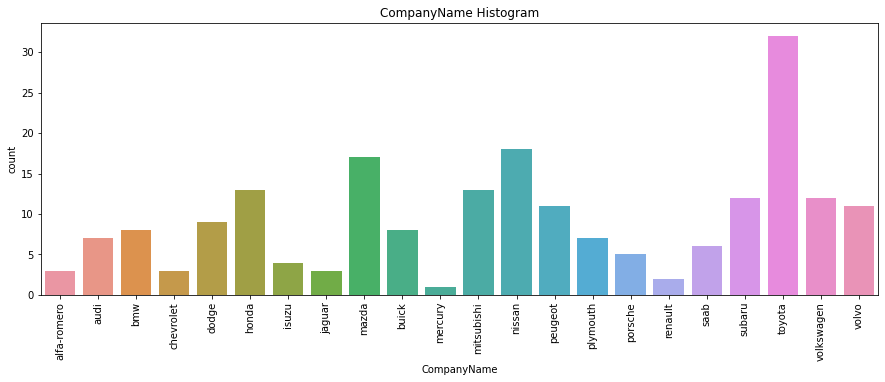

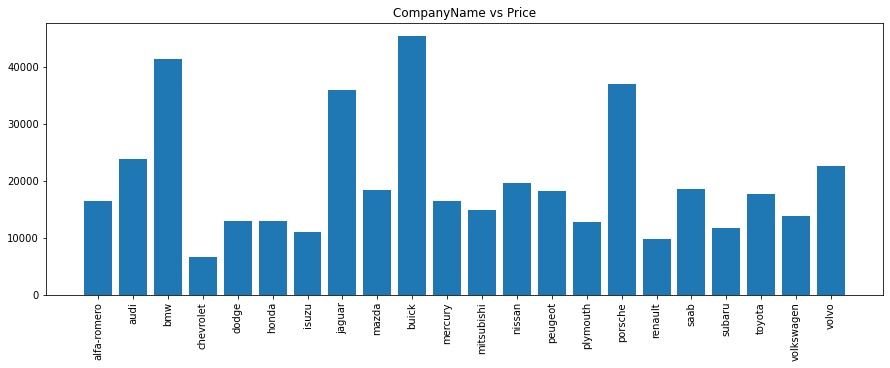

In [17]:
plt.figure(figsize=(15,5))

plt.title('CompanyName Histogram')
sns.countplot(x= data.CompanyName) 
plt.xticks(rotation=90)
plt.show()

plt.figure(figsize=(15,5))
plt.title('CompanyName vs Price')
plt.bar(data.CompanyName,data.price)
plt.xticks(rotation=90)
plt.show()

<b>Inference</b> :
- Toyota seemed to be the favored car company<b>(from CompanyName Histogram)</b>
- Buick company has high budget cars and low budget cars in dodge company.<b>(from CompanyName vs Price)</b>

> Thus CompanyName affects the pricing of cars

#### 4. fueltype

In [18]:
data.fueltype.value_counts()

gas       185
diesel     20
Name: fueltype, dtype: int64

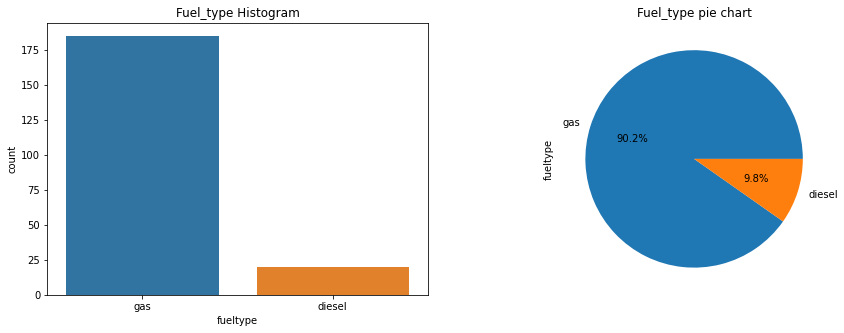

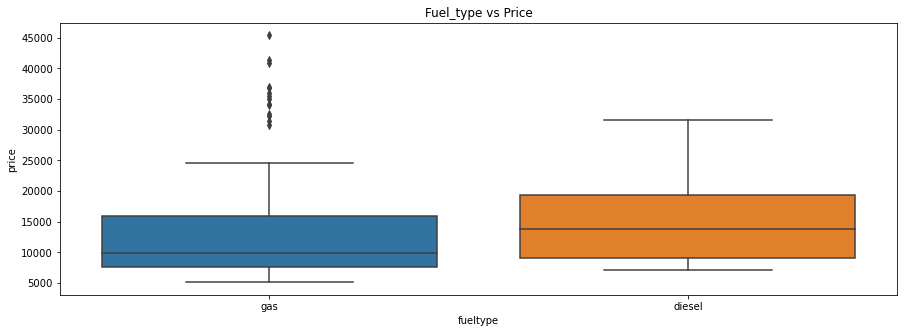

In [19]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Fuel_type Histogram')
sns.countplot(data.fueltype)


plt.subplot(1,2,2)
plt.title('Fuel_type pie chart')
data.fueltype.value_counts().plot(kind='pie',autopct= '%1.1f%%') 
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=data.fueltype,y=data.price)
plt.title('Fuel_type vs Price')
plt.show()

<b> Inference: </b>
- The number of gas-fueled cars is more than diesel.<b>(from Fuel_type Histogram)</b>
- Diesel has a higher price than gas.<b>(from Fuel_type vs Price)</b>

> Thus Fuel_type affects the price of the cars

#### 5. aspiration

In [20]:
data.aspiration.value_counts()

std      168
turbo     37
Name: aspiration, dtype: int64

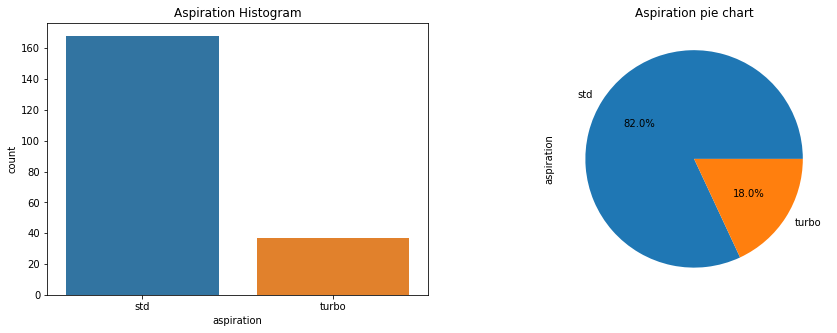

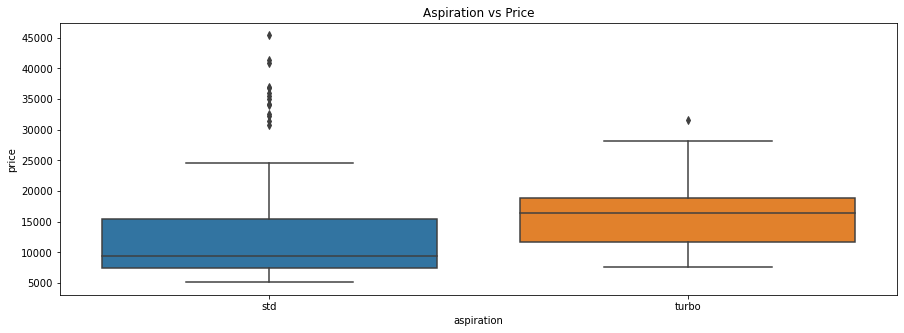

In [21]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Aspiration Histogram')
sns.countplot(data.aspiration)

plt.subplot(1,2,2)
plt.title('Aspiration pie chart')
data.aspiration.value_counts().plot(kind='pie',autopct='%1.1f%%')
plt.show()

plt.figure(figsize=(15,5))
plt.title('Aspiration vs Price')
sns.boxplot(x=data.aspiration,y=data.price)
plt.show()

<b> Inference: </b>
- More number of cars aspiration made with std.<b>(from Aspiration Histogram)</b>
- It seems aspiration with turbo have higher price range than the std(though it has some high values outside the whiskers).<b>(from Aspiration vs Price)</b>

> Thus Aspiration affects the price of the cars



#### 6. doornumber

In [22]:
data.doornumber.value_counts()

four    115
two      90
Name: doornumber, dtype: int64

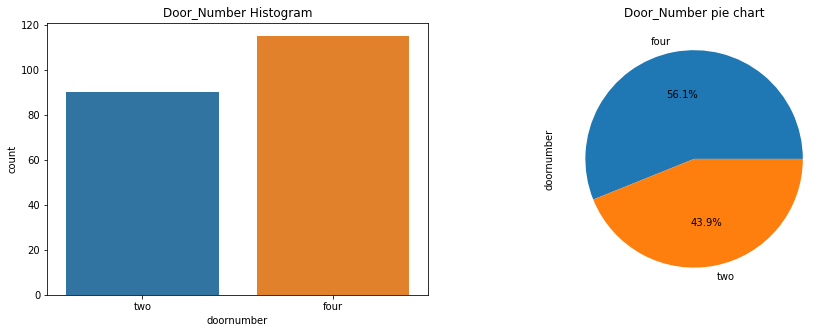

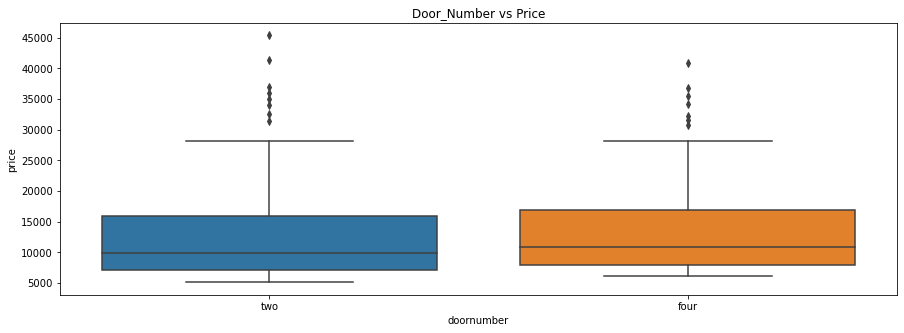

In [23]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Door_Number Histogram')
sns.countplot(data.doornumber)

plt.subplot(1,2,2)
plt.title('Door_Number pie chart')
data.doornumber.value_counts().plot(kind='pie',autopct= '%1.1f%%') 
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=data.doornumber,y=data.price)
plt.title('Door_Number vs Price')
plt.show()

<b> Inference: </b>
- Two-door manufacturing is slightly less than the four-door.<b>(from Door_Number Histogram)</b>
- Door_Number variable is not affecting the price much. There is no significant difference between the categories in it.<b>(from Door_Number vs Price)</b>

> Thus Door_Number <b>not affecting</b> the price of the cars


#### 7. carbody

In [24]:
data.carbody.value_counts()

sedan          96
hatchback      70
wagon          25
hardtop         8
convertible     6
Name: carbody, dtype: int64

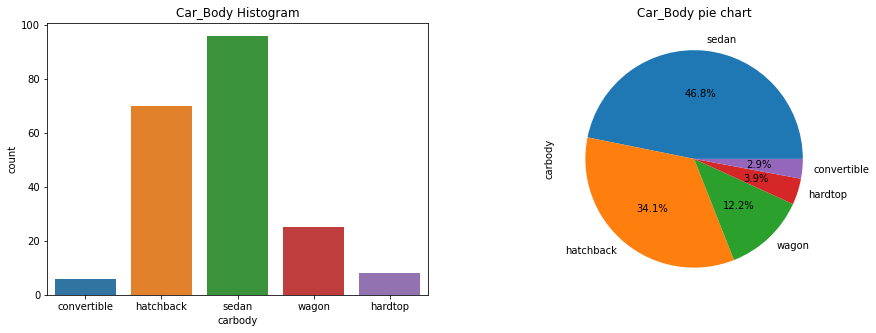

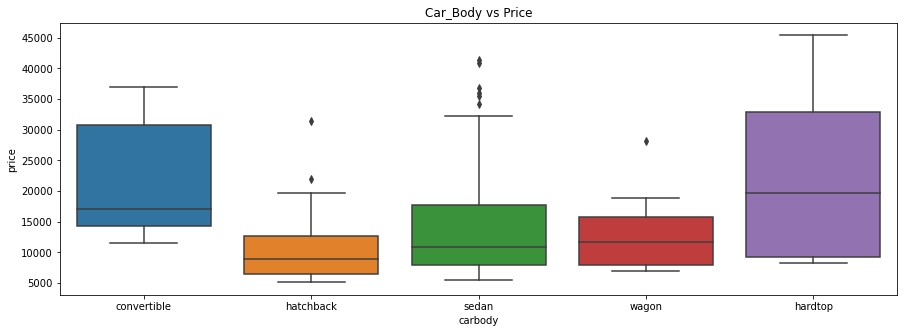

In [25]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car_Body Histogram')
sns.countplot(data.carbody)

plt.subplot(1,2,2)
plt.title('Car_Body pie chart')
data.carbody.value_counts().plot(kind='pie',autopct= '%1.1f%%') 
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=data.carbody,y=data.price)
plt.title('Car_Body vs Price')
plt.show()

<b> Inference: </b>
- Most of the body of the car made of the sedan.<b>(from Car_Body Histogram)</b>
- Hardtop and convertible are the most expensive whereas hatchbacks are the cheapest.<b>(from Car_Body vs Price)</b>

> Thus Car_Body affecting the price of the cars



#### 8. drivewheel

In [26]:
data.drivewheel.value_counts()

fwd    120
rwd     76
4wd      9
Name: drivewheel, dtype: int64

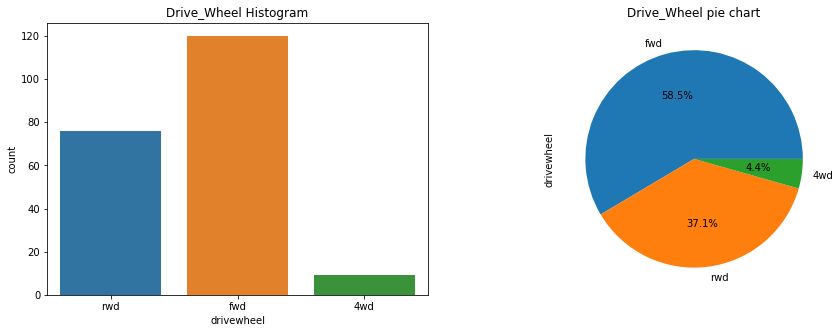

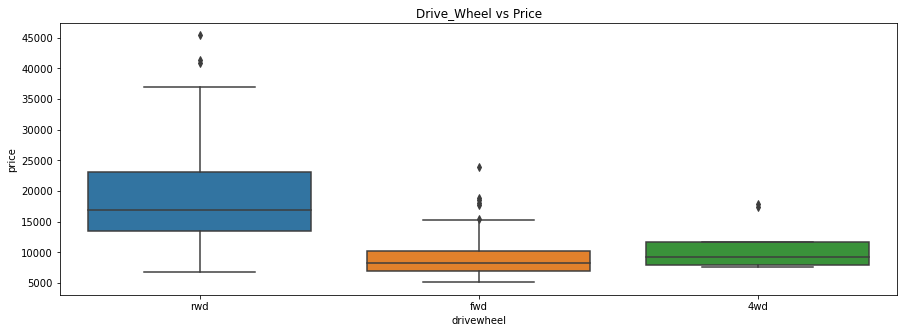

In [27]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Drive_Wheel Histogram')
sns.countplot(data.drivewheel)

plt.subplot(1,2,2)
plt.title('Drive_Wheel pie chart')
data.drivewheel.value_counts().plot(kind='pie',autopct= '%1.1f%%') 
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=data.drivewheel,y=data.price)
plt.title('Drive_Wheel vs Price')
plt.show()

<b> Inference: </b>
- Most of the cars are forward-wheel drive.<b>(from Drive_Wheel Histogram)</b>
- Most high ranged cars are preferred rwd drivewheel( Rear-wheel drive have a higher price value ).<b>(from Drive_Wheel vs Price)</b>

> Thus Drive_Wheel affecting the price



#### 9. enginelocation

In [28]:
data.enginelocation.value_counts()

front    202
rear       3
Name: enginelocation, dtype: int64

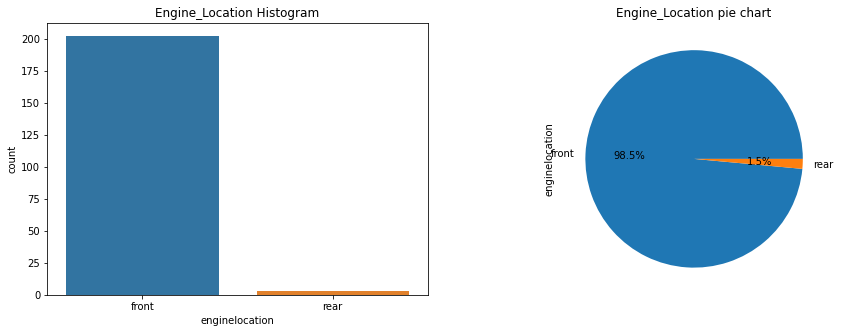

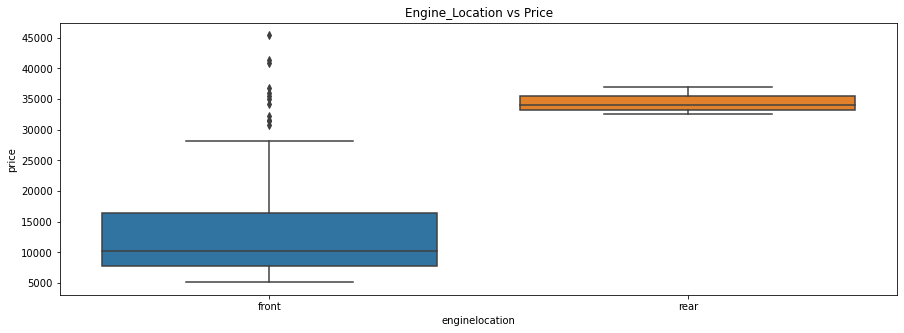

In [29]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine_Location Histogram')
sns.countplot(data.enginelocation)

plt.subplot(1,2,2)
plt.title('Engine_Location pie chart')
data.enginelocation.value_counts().plot(kind='pie',autopct= '%1.1f%%') 
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=data.enginelocation,y=data.price)
plt.title('Engine_Location vs Price')
plt.show()

<b> Inference: </b>
- Engine location mostly in front of the cars.<b>(from Engine_Location Histogram)</b>
- Very few datapoints for rear-engine location, but it seems too costly..<b>(from Engine_Location vs Price)</b>

> Thus Engine_Location affects the price of cars.


#### 10. enginetype

In [30]:
data.enginetype.value_counts()

ohc      148
ohcf      15
ohcv      13
l         12
dohc      12
rotor      4
dohcv      1
Name: enginetype, dtype: int64

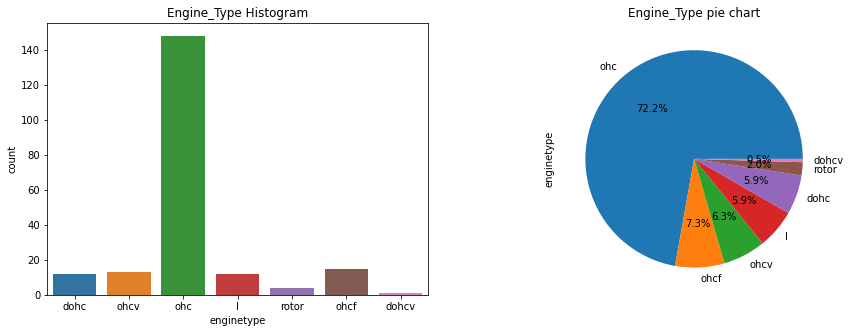

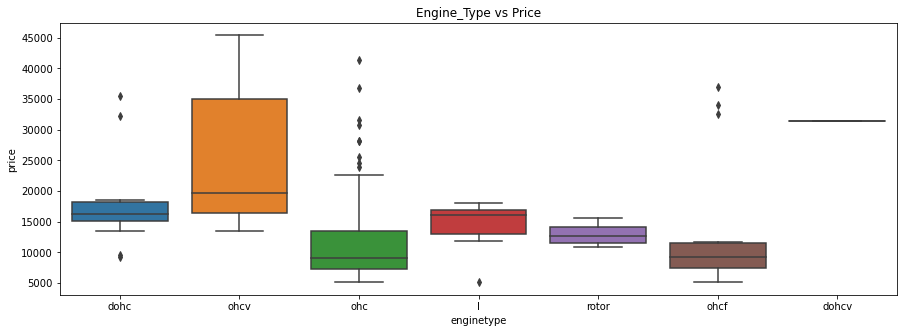

In [31]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine_Type Histogram')
sns.countplot(data.enginetype)

plt.subplot(1,2,2)
plt.title('Engine_Type pie chart')
data.enginetype.value_counts().plot(kind='pie',autopct= '%1.1f%%') 
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=data.enginetype,y=data.price)
plt.title('Engine_Type vs Price')
plt.show()

<b> Inference: </b>
- ohc Engine type seems to be the most favored type.<b>(from Engine_Type Histogram)</b>
- ohcv has the highest price range (While dohcv has only one row), ohc and ohcf have the low price range. <b>(from Engine_Type vs Price)</b>

> Thus Engine_Type affects the price of cars.




#### 11. cylindernumber

In [32]:
data.cylindernumber.value_counts()

four      159
six        24
five       11
eight       5
two         4
twelve      1
three       1
Name: cylindernumber, dtype: int64

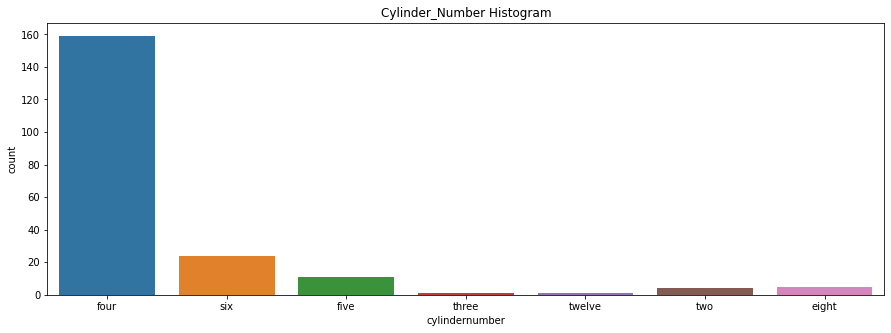

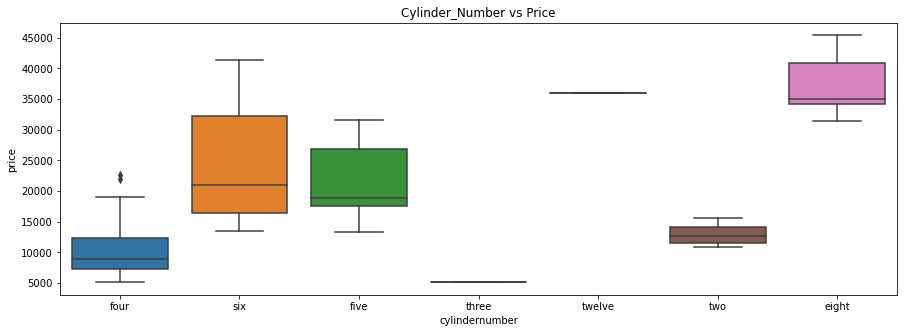

In [33]:
plt.figure(figsize=(15,5))


plt.title('Cylinder_Number Histogram')
sns.countplot(data.cylindernumber)
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=data.cylindernumber,y=data.price)
plt.title('Cylinder_Number vs Price')
plt.show()

<b> Inference: </b>
- four cylinder type seems to be the most favored type.<b>(from Cylinder_Number Histogram)</b>
- The most common number of cylinders are four, six, and five. Though eight cylinders have the highest price range. <b>(from Cylinder_Number vs Price)</b>

> Thus Cylinder_Number affects the price of cars.





#### 12. fuelsystem

In [34]:
data.fuelsystem.value_counts()

mpfi    94
2bbl    66
idi     20
1bbl    11
spdi     9
4bbl     3
mfi      1
spfi     1
Name: fuelsystem, dtype: int64

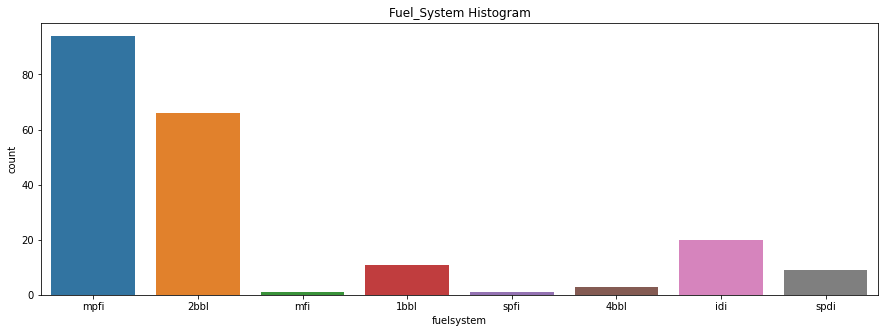

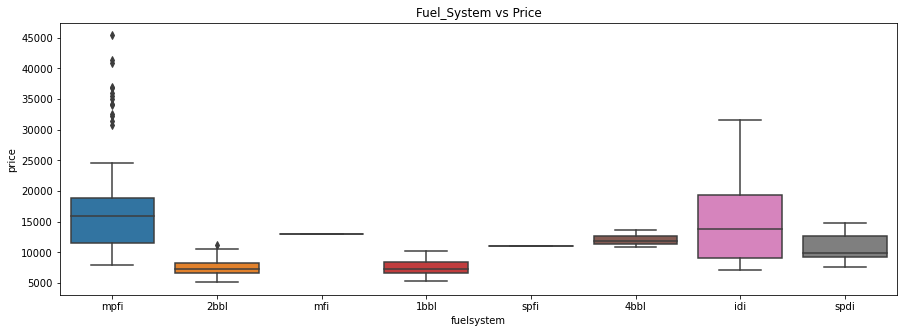

In [35]:
plt.figure(figsize=(15,5))

plt.title('Fuel_System Histogram')
sns.countplot(data.fuelsystem)
plt.show()

plt.figure(figsize=(15,5))
sns.boxplot(x=data.fuelsystem,y=data.price)
plt.title('Fuel_System vs Price')
plt.show()

<b> Inference: </b>
- mpfi and 2bbl are the most common type of fuel systems.<b>(from Fuel_System Histogram)</b>
-  mpfi and idi having the highest price range. But there are little data for other categories to derive any meaningful inference. <b>(from Fuel_System vs Price)</b>

> Thus Fuel_System affects the price of cars.





> <b>From the above analysis, other than the doornumber variable, all the categorical variables are affecting the price of cars </b>

### Step 3.2: Price comparison with continuous variables

#### 1. wheelbase

In [36]:
data.wheelbase.describe()

count    205.000000
mean      98.756585
std        6.021776
min       86.600000
25%       94.500000
50%       97.000000
75%      102.400000
max      120.900000
Name: wheelbase, dtype: float64

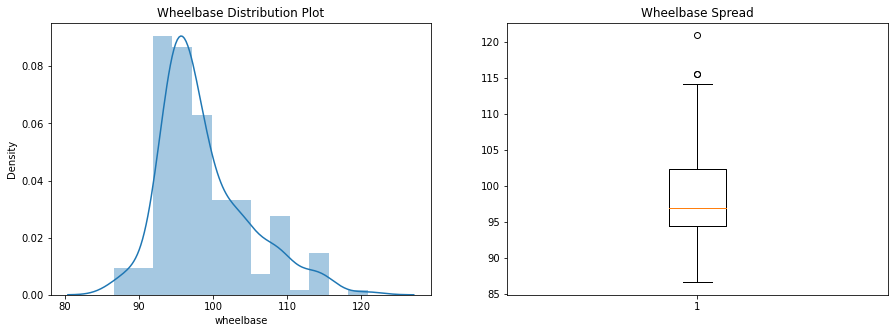

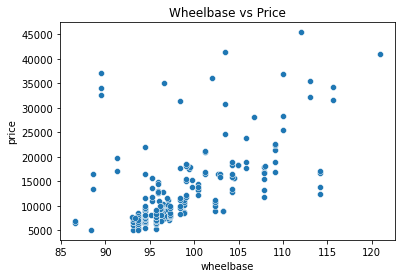

In [37]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Wheelbase Distribution Plot')
sns.distplot(data.wheelbase) #histogram representation of the distribution of data

plt.subplot(1,2,2)
plt.title('Wheelbase Spread')  #to shows the distribution of quantitative data
plt.boxplot(data.wheelbase)
plt.show()


sns.scatterplot(x=data.wheelbase,y=data.price) #show how much one variable is affected by another
plt.title('Wheelbase vs Price')
plt.show()



In [38]:
data[['price','wheelbase']].corr() #relationship between two variables is called their correlation
#to find whether positve or negative pattern

,price,wheelbase
price,1.000000,0.577816
wheelbase,0.577816,1.000000


- corr() used to find correlate the two variables were 1 to 0.6 strongly positive
- 0.5 to 0.1 slight positive and -0.1 to -0.5 slight negative and -0.6 to -1 strongly negative
- <b> while 0, there is no correlation between the variables </b>

<b> Inference: </b>
-  Most cars have a wheelbase around 95 inches.<b>(from Wheelbase Distribution Plot)</b>
-  Price has a slight positive correlation with wheelbase. <b>(from Wheelbase vs Price)</b>

> Thus there is a correlation between Wheelbase and price of cars, it affects the price of the cars




#### 2. carlength

In [39]:
data.carlength.describe()

count    205.000000
mean     174.049268
std       12.337289
min      141.100000
25%      166.300000
50%      173.200000
75%      183.100000
max      208.100000
Name: carlength, dtype: float64

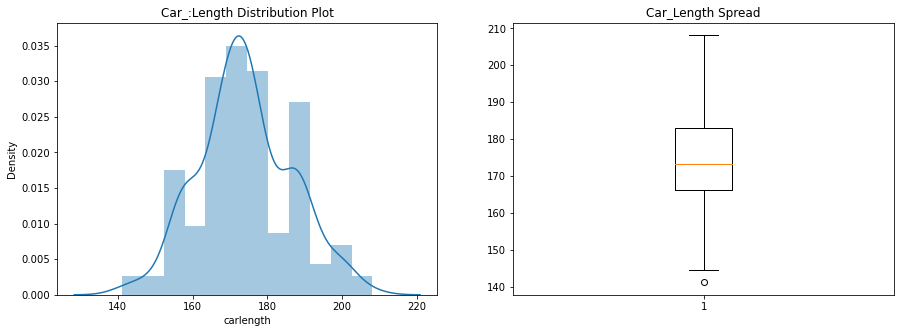

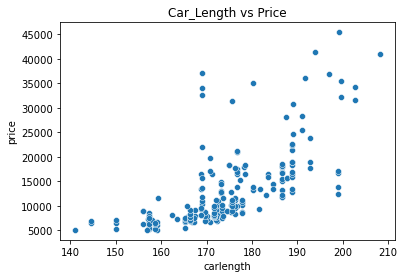

In [40]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car_:Length Distribution Plot')
sns.distplot(data.carlength) 

plt.subplot(1,2,2)
plt.title('Car_Length Spread')  
plt.boxplot(data.carlength)
plt.show()

sns.scatterplot(x=data.carlength,y=data.price) 
plt.title('Car_Length vs Price')
plt.show()

In [41]:
data[['price','carlength']].corr() 

,price,carlength
price,1.00000,0.68292
carlength,0.68292,1.00000


<b> Inference: </b>
- The length of the cars is strongly positively related to the price. <b>(from Car_Length vs Price)</b>

> Thus there is a correlation between carlength and price, it affects the price of the cars




#### 3. carwidth

In [42]:
data.carwidth.describe()

count    205.000000
mean      65.907805
std        2.145204
min       60.300000
25%       64.100000
50%       65.500000
75%       66.900000
max       72.300000
Name: carwidth, dtype: float64

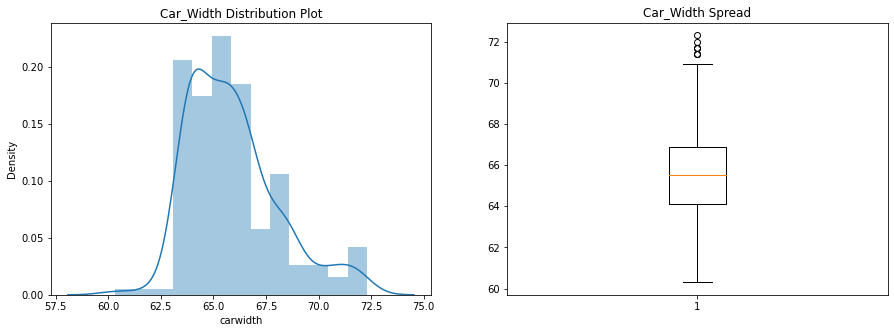

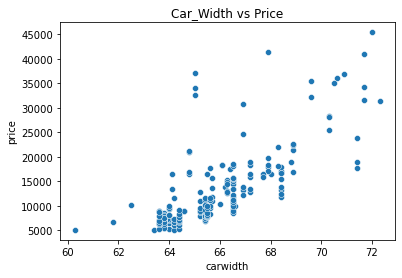

In [43]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car_Width Distribution Plot')
sns.distplot(data.carwidth) 

plt.subplot(1,2,2)
plt.title('Car_Width Spread')  
plt.boxplot(data.carwidth)
plt.show()

sns.scatterplot(x=data.carwidth,y=data.price) 
plt.title('Car_Width vs Price')
plt.show()

In [44]:
data[['price','carwidth']].corr()

,price,carwidth
price,1.000000,0.759325
carwidth,0.759325,1.000000


<b> Inference: </b>
- The Width of the cars is strongly positively related to the price. <b>(from Car_Width vs Price)</b>

> Thus there is a correlation between carwidth and price, it affects the price of the cars




#### 4. carheight

In [45]:
data.carheight.describe()

count    205.000000
mean      53.724878
std        2.443522
min       47.800000
25%       52.000000
50%       54.100000
75%       55.500000
max       59.800000
Name: carheight, dtype: float64

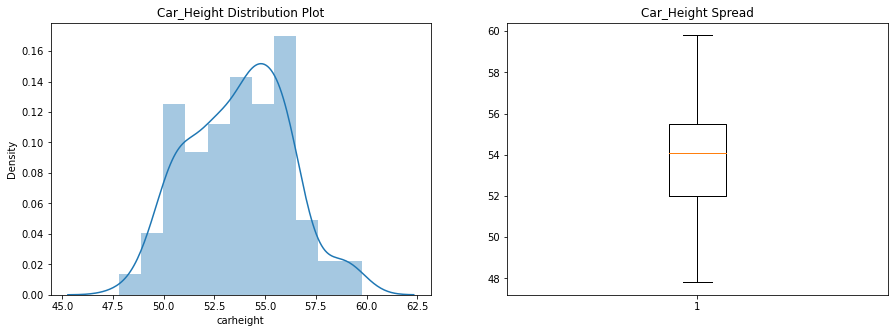

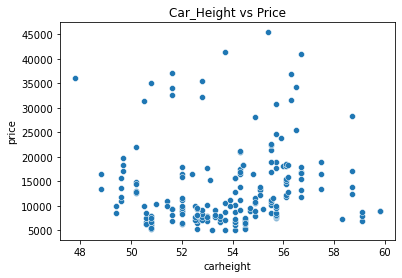

In [46]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Car_Height Distribution Plot')
sns.distplot(data.carheight) 

plt.subplot(1,2,2)
plt.title('Car_Height Spread')  
plt.boxplot(data.carheight)
plt.show()

sns.scatterplot(x=data.carheight,y=data.price) 
plt.title('Car_Height vs Price')
plt.show()

In [47]:
data[['price','carheight']].corr()

,price,carheight
price,1.000000,0.119336
carheight,0.119336,1.000000


<b> Inference: </b>
- There is not much correlation between the height of the car with price. <b>(from Car_Height vs Price)</b>

> Thus there is no correlation between carheight and price, <b>not affects</b> the price of the cars




#### 5. curbweight

In [48]:
data.curbweight.describe() 

count     205.000000
mean     2555.565854
std       520.680204
min      1488.000000
25%      2145.000000
50%      2414.000000
75%      2935.000000
max      4066.000000
Name: curbweight, dtype: float64

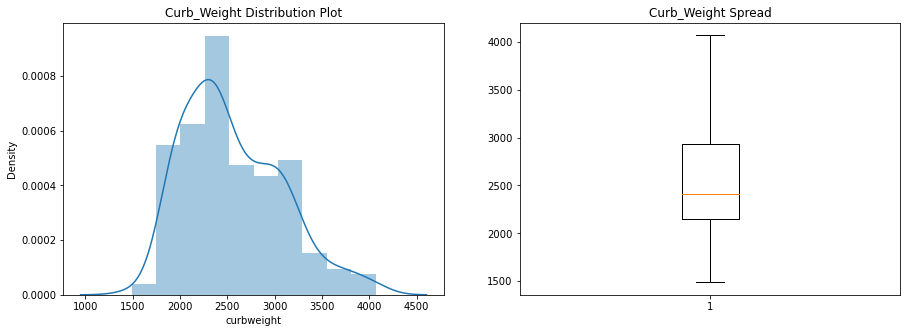

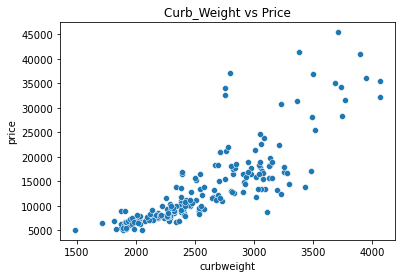

In [49]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Curb_Weight Distribution Plot')
sns.distplot(data.curbweight) 

plt.subplot(1,2,2)
plt.title('Curb_Weight Spread')  
plt.boxplot(data.curbweight)
plt.show()

sns.scatterplot(x=data.curbweight,y=data.price) 
plt.title('Curb_Weight vs Price')
plt.show()

In [50]:
data[['price','curbweight']].corr()

,price,curbweight
price,1.000000,0.835305
curbweight,0.835305,1.000000


<b> Inference: </b>
- The Weight of the cars is strongly positively related to the price. <b>(from Curb_Weight vs Price)</b>

> Thus there is a correlation between curbweight and price, it affects the price of the cars




#### 6. enginesize

In [51]:
data.enginesize.describe()

count    205.000000
mean     126.907317
std       41.642693
min       61.000000
25%       97.000000
50%      120.000000
75%      141.000000
max      326.000000
Name: enginesize, dtype: float64

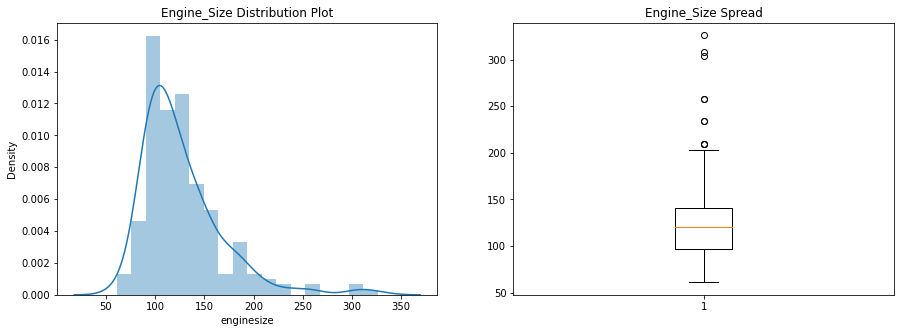

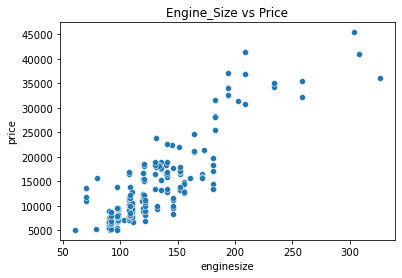

In [52]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Engine_Size Distribution Plot')
sns.distplot(data.enginesize) 

plt.subplot(1,2,2)
plt.title('Engine_Size Spread')  
plt.boxplot(data.enginesize)
plt.show()

sns.scatterplot(x=data.enginesize,y=data.price) 
plt.title('Engine_Size vs Price')
plt.show()

In [53]:
data[['price','enginesize']].corr()

,price,enginesize
price,1.000000,0.874145
enginesize,0.874145,1.000000


 <b> Inference: </b>
- Size of Engine has a strongly positive correlation with price. <b>(from Engine_Size vs Price)</b>

> Thus there is a correlation between enginesize and price, it affects the price of the cars





#### 7. boreratio

In [54]:
data.boreratio.describe()

count    205.000000
mean       3.329756
std        0.270844
min        2.540000
25%        3.150000
50%        3.310000
75%        3.580000
max        3.940000
Name: boreratio, dtype: float64

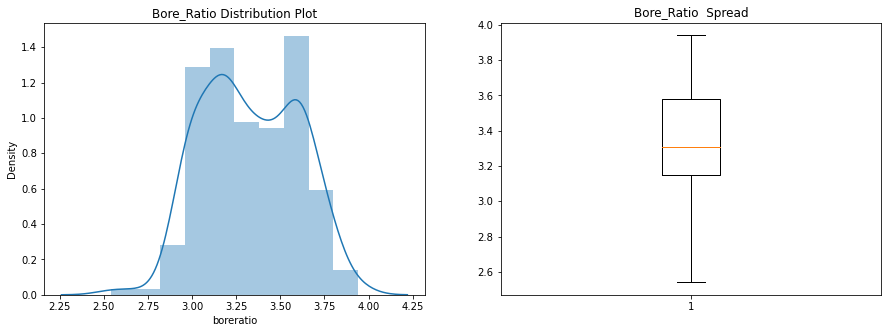

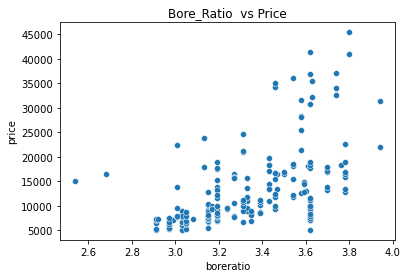

In [55]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Bore_Ratio Distribution Plot')
sns.distplot(data.boreratio) 

plt.subplot(1,2,2)
plt.title('Bore_Ratio  Spread')  
plt.boxplot(data.boreratio)
plt.show()

sns.scatterplot(x=data.boreratio,y=data.price) 
plt.title('Bore_Ratio  vs Price')
plt.show()

In [56]:
data[['price','boreratio']].corr() 

,price,boreratio
price,1.000000,0.553173
boreratio,0.553173,1.000000


 <b> Inference: </b>
- Bore ratio has a slight positive correlation with price. <b>(from Bore_Ratio vs Price)</b>

> Thus there is a correlation between boreratio and price, it affects the price of the cars





#### 8. stroke

In [57]:
data.stroke.describe()

count    205.000000
mean       3.255415
std        0.313597
min        2.070000
25%        3.110000
50%        3.290000
75%        3.410000
max        4.170000
Name: stroke, dtype: float64

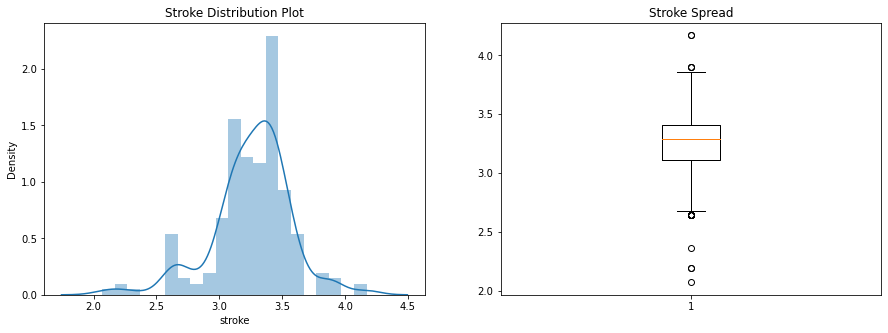

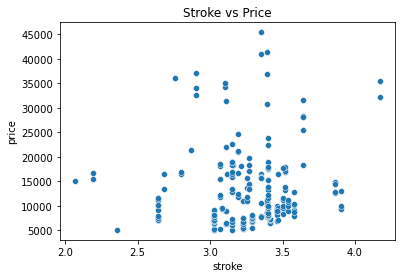

In [58]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Stroke Distribution Plot')
sns.distplot(data.stroke) 

plt.subplot(1,2,2)
plt.title('Stroke Spread')  
plt.boxplot(data.stroke)
plt.show()

sns.scatterplot(x=data.stroke,y=data.price) 
plt.title('Stroke vs Price')
plt.show()

In [59]:
data[['price','stroke']].corr()

,price,stroke
price,1.000000,0.079443
stroke,0.079443,1.000000


 <b> Inference: </b>
- Stroke does not correlate with price. <b>(from Stroke vs Price)</b>

> Thus there is no correlation between stroke and price, it <b>not affects</b> the price of the cars





#### 9. compressionratio

In [60]:
data.compressionratio.describe()

count    205.000000
mean      10.142537
std        3.972040
min        7.000000
25%        8.600000
50%        9.000000
75%        9.400000
max       23.000000
Name: compressionratio, dtype: float64

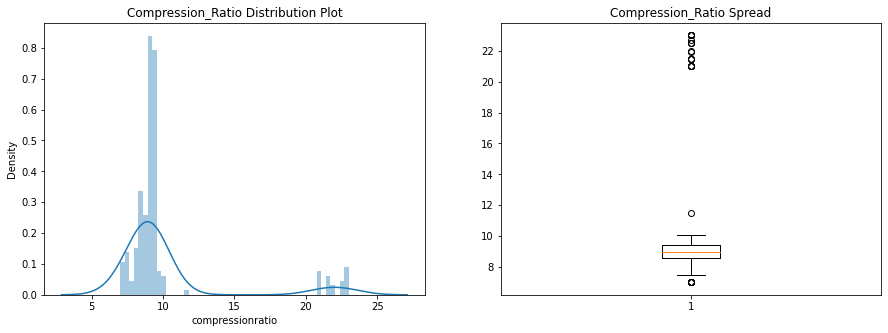

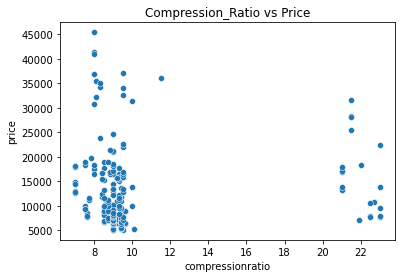

In [61]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Compression_Ratio Distribution Plot')
sns.distplot(data.compressionratio) 

plt.subplot(1,2,2)
plt.title('Compression_Ratio Spread')  
plt.boxplot(data.compressionratio)
plt.show()

sns.scatterplot(x=data.compressionratio,y=data.price) 
plt.title('Compression_Ratio vs Price')
plt.show()

In [62]:
data[['price','compressionratio']].corr()

,price,compressionratio
price,1.000000,0.067984
compressionratio,0.067984,1.000000


 <b> Inference: </b>
- Compression_Ratio does not correlate with price. <b>(from Compression_Ratio vs Price)</b>

> Thus there is no correlation between compressionratio and price, it <b>not affects</b> the price of the cars





#### 10. horsepower

In [63]:
data.horsepower.describe()

count    205.000000
mean     104.117073
std       39.544167
min       48.000000
25%       70.000000
50%       95.000000
75%      116.000000
max      288.000000
Name: horsepower, dtype: float64

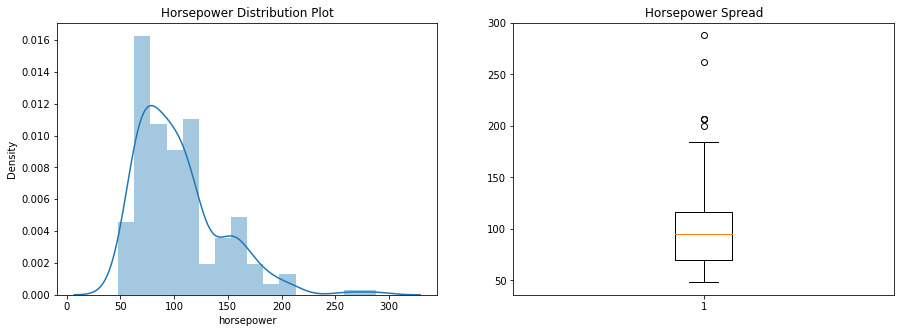

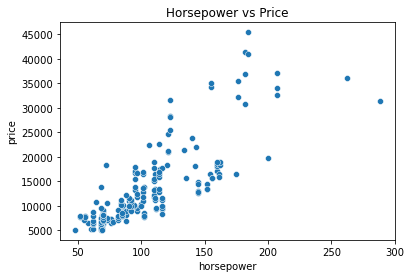

In [64]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Horsepower Distribution Plot')
sns.distplot(data.horsepower) 

plt.subplot(1,2,2)
plt.title('Horsepower Spread')  
plt.boxplot(data.horsepower)
plt.show()

sns.scatterplot(x=data.horsepower,y=data.price) 
plt.title('Horsepower vs Price')
plt.show()

In [65]:
data[['price','horsepower']].corr()

,price,horsepower
price,1.000000,0.808139
horsepower,0.808139,1.000000


 <b> Inference: </b>
- Horsepower has a strongly positive correlation with price. <b>(from Horsepower vs Price)</b>

> Thus there is a correlation between horsepower and price, it affects the price of the cars





#### 11. peakrpm

In [66]:
data.peakrpm.describe() 

count     205.000000
mean     5125.121951
std       476.985643
min      4150.000000
25%      4800.000000
50%      5200.000000
75%      5500.000000
max      6600.000000
Name: peakrpm, dtype: float64

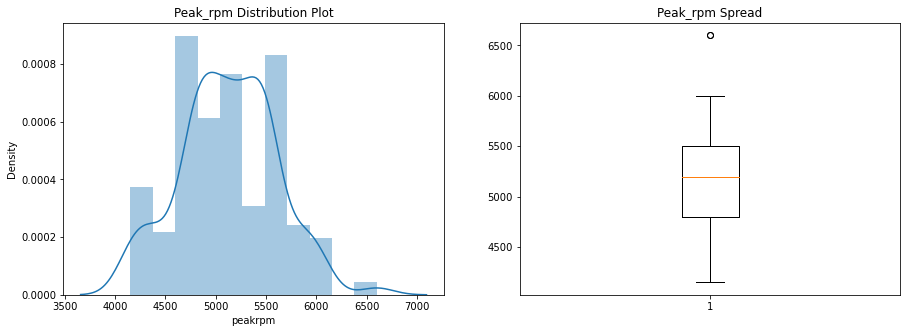

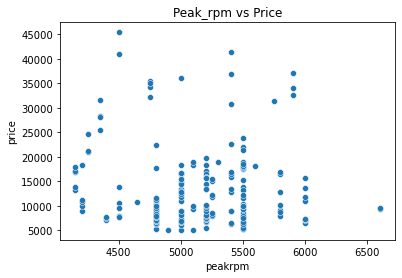

In [67]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Peak_rpm Distribution Plot')
sns.distplot(data.peakrpm) 

plt.subplot(1,2,2)
plt.title('Peak_rpm Spread')  
plt.boxplot(data.peakrpm)
plt.show()

sns.scatterplot(x=data.peakrpm,y=data.price) 
plt.title('Peak_rpm vs Price')
plt.show()

In [68]:
data[['price','peakrpm']].corr()

,price,peakrpm
price,1.000000,-0.085267
peakrpm,-0.085267,1.000000


 <b> Inference: </b>
- Peak_rpm does not correlate with price. <b>(from Peak_rpm vs Price)</b>

> Thus there is no correlation between peakrpm and price, it <b>not affects</b> the price of the cars





#### 12. citympg

In [69]:
data.citympg.describe()

count    205.000000
mean      25.219512
std        6.542142
min       13.000000
25%       19.000000
50%       24.000000
75%       30.000000
max       49.000000
Name: citympg, dtype: float64

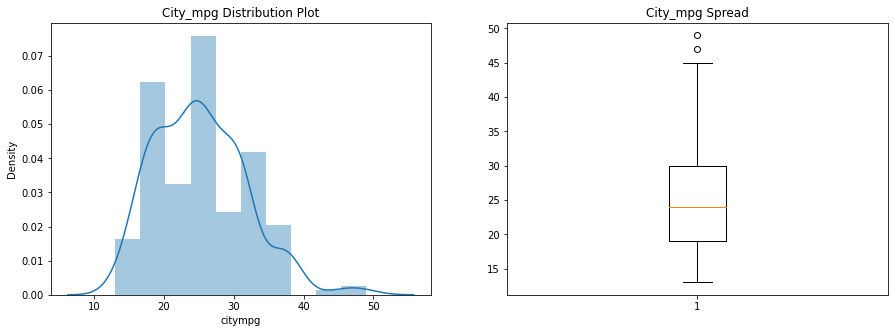

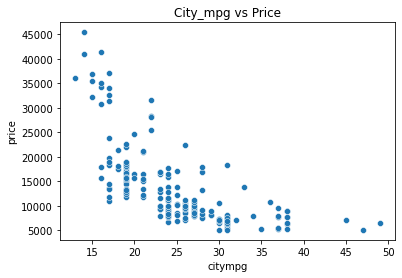

In [70]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('City_mpg Distribution Plot')
sns.distplot(data.citympg) 

plt.subplot(1,2,2)
plt.title('City_mpg Spread')  
plt.boxplot(data.citympg)
plt.show()

sns.scatterplot(x=data.citympg,y=data.price) 
plt.title('City_mpg vs Price')
plt.show()

In [71]:
data[['price','citympg']].corr()

,price,citympg
price,1.000000,-0.685751
citympg,-0.685751,1.000000


 <b> Inference: </b>
- City_mpg has a strongly negative correlation with price. <b>(from City_mpg vs Price)</b>

> Thus there is a correlation between citympg and price, it affects the price of the cars





#### 13. highwaympg

In [75]:
data.highwaympg.describe()

count    205.000000
mean      30.751220
std        6.886443
min       16.000000
25%       25.000000
50%       30.000000
75%       34.000000
max       54.000000
Name: highwaympg, dtype: float64

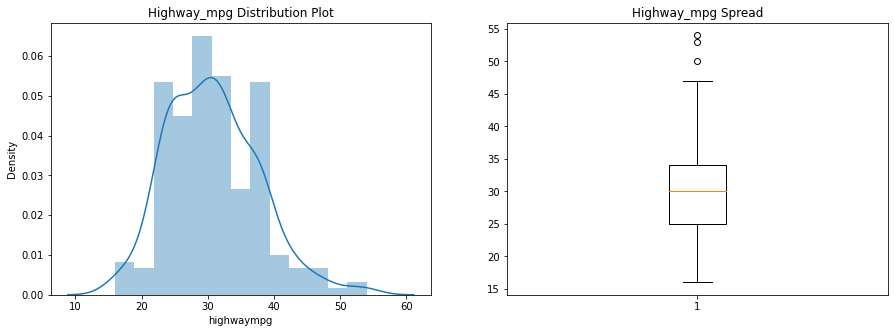

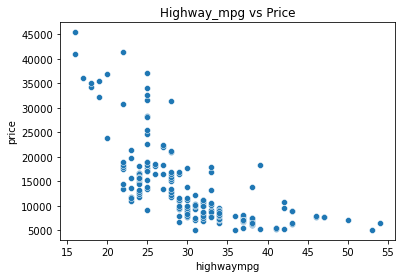

In [73]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Highway_mpg Distribution Plot')
sns.distplot(data.highwaympg) 

plt.subplot(1,2,2)
plt.title('Highway_mpg Spread')  
plt.boxplot(data.highwaympg)
plt.show()

sns.scatterplot(x=data.highwaympg,y=data.price) 
plt.title('Highway_mpg vs Price')
plt.show()

In [74]:
data[['price','highwaympg']].corr()

,price,highwaympg
price,1.000000,-0.697599
highwaympg,-0.697599,1.000000


 <b> Inference: </b>
- Highway_mpg has a strongly negative correlation with price. <b>(from Highway_mpg vs Price)</b>

> Thus there is a correlation between highwaympg and price, it affects the price of the cars





<b> These are the variables affecting the price of the cars:</b>

- doornumber
- carheight
- stroke
- compressionratio
- peakrpm



## Summary of EDA Analysis:

From the above Univariate and bivariate analysis we can filter out variables which does not affect the price much.

The most important driver variable for prediction of price are:-

<b>In Categorical data </b>

1. CompanyName
2. symboling
3. fueltype
4. aspiration
5. carbody
6. drivewheel
7. enginelocation
8. enginetype
9. cylindernumber
10. fuelsystem


<b>In Continuous data </b>

11. wheelbase
12. carlength
13. carwidth
14. curbweight
15. enginesize
16. boreratio
17. horsepower
18. citympg
19. highwaympg


